Lab 2: Text Classification
=============

In this problem set, you will build a system for automatically classifying song lyrics comments by era. You will:

- Do some basic text processing, tokenizing your input and converting it into a bag-of-words representation
- Build a machine learning classifier based on the generative model, using Naive Bayes
- Evaluate your classifiers and examine what they have learned
- Build a logistic regression classifier (discriminative model) using scikit-learn

Total Points: 120 points

# 0. Setup

In order to develop this assignment, you will need [python 3.6](https://www.python.org/downloads/) and the following libraries. Most if not all of these are part of [anaconda](https://www.continuum.io/downloads), so a good starting point would be to install that.

- [jupyter](http://jupyter.readthedocs.org/en/latest/install.html)
- numpy (This will come if you install scipy like above, but if not install separately)
- [matplotlib](http://matplotlib.org/users/installing.html)
- [nosetests](https://nose.readthedocs.org/en/latest/)
- [pandas](http://pandas.pydata.org/) Dataframes

Here is some help on installing packages in python: https://packaging.python.org/installing/. You can use ```pip --user``` to install locally without sudo.

## About this assignment

- This is a Jupyter notebook. You can execute cell blocks by pressing control-enter.
- All of your coding will be in the python file ```lab2.py```. 
- The file ```tests/tests_visible.py``` contains the Gradescope autograder unit tests that will be available for you to run locally. You should run them as you work on the assignment to see that you're on the right track. You are free to look at their source code, if that helps. You can run the tests by running ```python run_tests.py``` or ```python run_tests.py -j``` for more description. 
- You may want to add more tests, but that is completely optional. 
- **To submit this assignment, submit ```lab2.py``` on Gradescope.**

## Important Instructions for this assignment

- Since each test case takes about 1 minute to run individually and the collective test suite takes about 20-30 minutes to run in its entirety, we recommend that when you implement an individual function you can comment out the remaining test case functions in tests/test_visible.py and only keep the corresponding test case and the def Setup(self) (i.e first function) in an uncommented state.
- We estimate that your completed code should be able to complete running on all the test cases in about 20-30 minuetes. However, if your code takes longer to run, follow the next bullet point.
- The gradescope autograder has a runtime limit of 40 minutes, so if your code times out with the autograder unable to run on all the test cases, then we have a solution for you. The ECE 365 Gradescope page has two assignments: **NLP Lab 2 Code** and **NLP Lab 2 Screenshot**. You will submit your code to **NLP Lab 2 Code**, which will run the autograder. If your code is unable to finish running on all the test cases before timeout, then you would need to submit a screenshot of the local test case output on the **NLP Lab 2 Screenshot** assignment. First run ```python run_tests.py -j``` in the assignment directory and then take a screenshot of the  prompt which shows your final score. An example screenshot is shown below.
- You only need to submit the screenshot if the gradescope autograder is unable to run your code on all the test cases. Submitting your code in **NLP Lab 2 Code**  is a requirement and you will not recieve any credit from your screenshot submission if you have not submitted your code. 

![title](screenshot.png)

In [1]:
import sys
from importlib import reload

In [2]:
import lab2

In [3]:
print('My Python version')

print('python: {}'.format(sys.version))

My Python version
python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [4]:
import nose

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch import optim

%matplotlib inline

In [5]:
print('My library versions')

print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('scipy: {}'.format(sp.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('nose: {}'.format(nose.__version__))
print('torch: {}'.format(torch.__version__))

My library versions
pandas: 1.1.3
numpy: 1.19.2
scipy: 1.5.2
matplotlib: 3.3.2
nose: 1.3.7
torch: 1.8.1+cpu


To test whether your libraries are the right version, run:

`nosetests tests/test_environment.py`

In [6]:
# use ! to run shell commands in notebook
! nosetests tests/test_environment.py

.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


# 1. Preprocessing

**Total: 20 points**

Read the data into a dataframe

In [7]:
df_train = pd.read_csv('lyrics-train.csv')

A dataframe is a structured representation of your data. You can preview a dataframe using `head()`

In [8]:
df_train.head()

,Era,Lyrics
0,pre-1980,come on come on let me show you where its at a...
1,1980s,welcome to the big time youre bound to be a s...
2,pre-1980,once i believed that when love came to me it ...
3,2000s,i took my love and i took it down climbed a m...
4,pre-1980,do do do do do do do do do do do do do do do ...


## Bags of words

Your first task is to convert the text to a bag-of-words representation. For this data, a lot of the preprocessing is already done: the text is lower-cased, and punctuation is removed. You need only create a `counter` for each instance.

- **Deliverable 1.1**: Complete the function `lab2.bag_of_words`. (5 points)
- **Test**: `tests/test_visible.py:test_d1_1_bow`

In [9]:
# run this block to update the notebook as you change the preproc library
reload(lab2);

In [10]:
y_tr,x_tr = lab2.read_data('lyrics-train.csv',preprocessor=lab2.bag_of_words)
y_dv,x_dv = lab2.read_data('lyrics-dev.csv',preprocessor=lab2.bag_of_words)

In [11]:
y_te,x_te = lab2.read_data('lyrics-test-hidden.csv',preprocessor=lab2.bag_of_words)

## Unseen words

One challenge for classification is that words will appear in the test data that do not appear in the training data. Compute the number of words that appear in `lyrics-dev.csv`, but not in `lyrics-train.csv`. To do this, implement the following deliverables:

- **Deliverable 1.2**: implement `lab2.compute_oov`, returning a list of words that appear in one list of bags-of-words, but not another. Also implement `lab2.aggregate_counts` (10 points)
- **Tests**: `tests/test_visible.py:test_d1_3a_oov` and `tests/test_visible.py:test_d1_2agg`

In [12]:
from collections import Counter

In [13]:
reload(lab2);

To write fast code, you can find bottlenecks using the %%timeit cell magic. (The following line will run for about 5 mins.)

In [14]:
%%timeit
lab2.aggregate_counts(x_tr)

48.1 s ± 2.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
counts_dv = lab2.aggregate_counts(x_dv)

You can see the most common items in a counter by calling `counts.most_common()`:

In [16]:
counts_dv.most_common(5)

[('you', 5542), ('i', 5535), ('the', 5061), ('to', 3203), ('and', 2953)]

In [17]:
counts_tr = lab2.aggregate_counts(x_tr)

In [18]:
len(lab2.compute_oov(counts_dv,counts_tr))

2677

In [19]:
len(lab2.compute_oov(counts_tr,counts_dv))

30459

In [20]:
lab2.oov_rate(counts_dv,counts_tr)

0.297246280257606

30% of the words in the dev set do not appear in the training set.

## Pruning the vocabulary

Let's prune the vocabulary to include only words that appear at least ten times in the training data.

- **Deliverable 1.3:** Implement `lab2.prune_vocabulary` (5 points)
- **Test**: `tests/test_visible.py:test_d1_4_prune`

In [21]:
reload(lab2);

In [22]:
x_tr_pruned, vocab = lab2.prune_vocabulary(counts_tr,x_tr,10)
x_dv_pruned, _ = lab2.prune_vocabulary(counts_tr,x_dv,10)
x_te_pruned, _ = lab2.prune_vocabulary(counts_tr,x_te,10)

In [23]:
len(vocab)

4875

In [24]:
i = 94
print(len(x_dv[i]),len(x_dv_pruned[i]))
print(sum(x_dv[i].values()),sum(x_dv_pruned[i].values()))

88 79
187 176


In [31]:
! nosetests tests/test_visible.py
# ! python run_tests.py

....
----------------------------------------------------------------------
Ran 4 tests in 252.071s

OK


# 2. Linear classification

Now we'll show you how to implement the linear classification rule, $\hat{y} = \text{argmax}_y \theta^{\top} f(x,y)$.

You will use these functions in all classifiers in this assignment.

**Total: 10 points** 

In [25]:
reload(lab2);

The feature function vector $f(x,y)$ can be viewed as a dict, in which the values are counts, and the keys are tuples $(y,x_j)$, where $y$ is a label and $x_j$ is a base feature. Note that we must also include the offset feature, ```lab2.OFFSET```. Desired output is shown below:

In [26]:
fv = lab2.make_feature_vector({'test':1,'case':2},'1980s')

In [27]:
print(fv)

{('1980s', 'test'): 1, ('1980s', 'case'): 2, ('1980s', '**OFFSET**'): 1}


Let's compute the entire set of labels.

In [28]:
labels = set(y_tr) #figure out all possible labels
print(labels)

{'1980s', '1990s', '2000s', 'pre-1980'}


Now we implement the prediction rule, $\hat{y} = \text{argmax}_y \theta^{\top} f(x,y)$.

The output should be:

- A predicted label
- The scores of all labels

You can test this function using these simple hand-crafted weights.

In [29]:
from collections import defaultdict
reload(lab2)

<module 'lab2' from 'C:\\Users\\Vijayendra Jagtap\\OneDrive\\Desktop\\ECE365\\nlplab2_dist\\nlplab2_dist\\lab2.py'>

In [30]:
# weight vectors must be defaultdicts
theta_hand = defaultdict(float,
                         {('2000s','money'):0.1,
                          ('2000s','name'):0.2,
                          ('1980s','tonight'):0.1,
                          ('2000s','man'):0.1,
                          ('1990s','fly'):0.1,
                          ('pre-1980',lab2.OFFSET):0.1
                         })

In [31]:
lab2.predict(x_tr_pruned[0],theta_hand,labels)

('2000s',
 {'1980s': 0, '1990s': 0, '2000s': 1.3000000000000003, 'pre-1980': 0.1})

Now let's see how good these weights are, by evaluating on the dev set.

In [32]:
reload(lab2);

In [33]:
# this applies your predict function to all the instances in ```x_dv```
y_hat = lab2.predict_all(x_dv_pruned,theta_hand,labels)
print(lab2.acc(y_hat,y_dv))

0.3422222222222222


# 3. Naive Bayes

You'll now implement a Naive Bayes classifier in this section.

**Total: 45 points**

In [34]:
reload(lab2);

- **Deliverable 3.1**: (warmup) implement ```get_corpus_counts``` in ```lab2.py```. (5 points)
- **Test**: `tests/test_visible.py:test_d3_1_corpus_counts`

This function should compute the word counts for a given label.

In [35]:
eighties_counts = lab2.get_corpus_counts(x_tr_pruned,y_tr,"1980s");
print(eighties_counts['today'])
print(eighties_counts['yesterday'])
print(eighties_counts['internets'])

50
14
0


- **Deliverable 3.2**: Implement ```estimate_pxy``` in ```lab2.py```. (15 points)
- **Test**: `tests/test_visible.py:test_d3_2_pxy`

This function should compute the *smoothed* multinomial distribution $\log P(x \mid y)$ for a given label $y$.
Note that this function takes the vocabulary as an argument. You have to assign a probability even for words that do not appear in documents with label $y$, if they are in the vocabulary.

Hint: You can use ```get_corpus_counts``` in this function if you want to, but you don't have to.

In [36]:
log_pxy = lab2.estimate_pxy(x_tr_pruned,y_tr,"1980s",0.1,vocab)

Probabilities must sum to one! (or very close)

In [37]:
sum(np.exp(list(log_pxy.values())))

0.9999999999999506

Let's look at the log-probabilities of the words from the hand-tuned weights

In [38]:
print({word:log_pxy[word] for (_,word),weight in theta_hand.items() if weight>0})

{'money': -7.689562807416732, 'name': -7.568324713816848, 'tonight': -6.216637557007502, 'man': -6.63187694645784, 'fly': -8.636944126360918, '**OFFSET**': 0.0}


In [39]:
log_pxy_more_smooth = lab2.estimate_pxy(x_tr_pruned,y_tr,"1980s",1000,vocab)

In [40]:
print({word:log_pxy_more_smooth[word] for (_,word),weight in theta_hand.items() if weight>0})

{'money': -8.443741629859995, 'name': -8.43282250408468, 'tonight': -8.191919045665923, 'man': -8.295226983039361, 'fly': -8.497300695217104, '**OFFSET**': 0.0}


- **Deliverable 3.3**: Now you are ready to implement ```estimate_nb``` in ```lab2.py```. (15 points)
- **Test**: `tests/test_visible.py:test_d3_3a_nb`



- The goal is that the score given by ```lab2.predict``` is equal to the joint probability $P(x,y)$, as described in the notes. Therefore, make sure your return output can be feed into ```lab2.predict```. 
- Don't forget the offset feature, whose weights should be set to the prior $\log P(y)$.
- The log-probabilities for the offset feature should not be smoothed.
- You can call the functions you have defined above, but you don't have to.

In [41]:
reload(lab2);
theta_nb = lab2.estimate_nb(x_tr_pruned,y_tr,0.1)

Let's predict for a single instance. 

In [42]:
lab2.predict(x_tr_pruned[155],theta_nb,labels)

('2000s',
 {'1980s': -2153.019927798136,
  '1990s': -2125.1966084804503,
  '2000s': -2099.247401056139,
  'pre-1980': -2136.8348423968023})

In [43]:
aaa = lab2.predict(x_tr_pruned[155],theta_nb,labels)
print(aaa)
aaa = lab2.predict(x_tr_pruned[55],theta_nb,labels)
print(aaa)

('2000s', {'1980s': -2153.019927798136, '1990s': -2125.1966084804503, '2000s': -2099.247401056139, 'pre-1980': -2136.8348423968023})
('1980s', {'1980s': -1735.3527509275218, '1990s': -1851.2801316678658, '2000s': -1840.50646909292, 'pre-1980': -1798.5641514619065})


Let's predict for all instances of the development set. 

In [44]:
y_hat = lab2.predict_all(x_dv_pruned,theta_nb,labels)
print(lab2.acc(y_hat,y_dv))

0.46444444444444444


In [45]:
# this block shows how we write and read predictions for evaluation
lab2.write_predictions(y_hat,'nb-dev.preds')
y_hat_dv = lab2.read_predictions('nb-dev.preds')
lab2.acc(y_hat_dv,y_dv)

0.46444444444444444

In [46]:
# execute this block to write predictions for the test set
y_hat = lab2.predict_all(x_te_pruned,theta_nb,labels)
lab2.write_predictions(y_hat,'nb-test.preds')

- **Deliverable 3.4**: Write a function in ```lab2.py``` called ```find_best_smoother```, which finds the smoothing value that gives best performance on the dev data.  (5 points)
- **Test**: `tests/test_visible.py:test_d3_4a_nb_best`

Your function should be trying at least the following values in `vals` below.

Then, using this smoothing value, run your Naive Bayes classifier on the test set, and output the results.

In [47]:
vals = np.logspace(-3,2,11)
print(vals)

[1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02]


In [48]:
reload(lab2);
best_smoother, scores = lab2.find_best_smoother(x_tr_pruned,y_tr,x_dv_pruned,y_dv,vals)

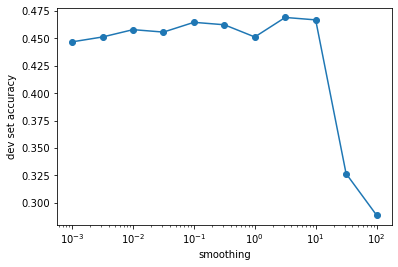

In [49]:
plt.semilogx(list(scores.keys()),list(scores.values()),'o-');
plt.xlabel('smoothing')
plt.ylabel('dev set accuracy');

**Reflect:**

- what might explain the dramatic drop in accuracy when the smoothing is increased from $10$ to $30$?
- before you check, predict whether the accuracy will continue to significantly drop if you further increase the smoothing to $10000$.

**Your Answer Here**: 

Save the best parameters for later comparison. 

In [50]:
theta_nb = lab2.estimate_nb(x_tr_pruned,y_tr,best_smoother)
y_hat = lab2.predict_all(x_te_pruned,theta_nb,labels)
lab2.write_predictions(y_hat,'nb-best-test.preds')

# 4. Logistic regression

You will implement logistic regression in scikit-learn.

**Total: 15 points**


## 4.1 Converting data to numpy

Numpy is a package for numerical computing in python.

You will need to convert your bag-of-words list of counters to a numpy array. 

- **Deliverable 4.1**: Implement `lab2.py:make_numpy()` (5 points)
- **Test**: `tests/test_visible.py:test_d4_1_numpy`
- **Hint**: one approach is to start with `numpy.zeros((height,width))`, and then fill in the cells by iterating through the bag-of-words list

In [51]:
X = np.zeros((4,2))
print(X)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [52]:
X[1,1] = -1
X[2,0] = 1.5
print(X)

[[ 0.   0. ]
 [ 0.  -1. ]
 [ 1.5  0. ]
 [ 0.   0. ]]


In [53]:
reload(lab2);

In [54]:
X_tr = lab2.make_numpy(x_tr_pruned,vocab)
X_dv = lab2.make_numpy(x_dv_pruned,vocab)
X_te = lab2.make_numpy(x_te_pruned,vocab)

In [55]:
label_set = sorted(list(set(y_tr)))
print(label_set)

['1980s', '1990s', '2000s', 'pre-1980']


In [56]:
Y_tr = np.array([label_set.index(y_i) for y_i in y_tr])
Y_dv = np.array([label_set.index(y_i) for y_i in y_dv])

In [57]:
len(set(Y_tr))

4

## 4.2 Building a logistic regression model

Import the model you want to use and make an instance of the Model.

In [59]:
from sklearn.linear_model import LogisticRegression
scikit_log_reg = LogisticRegression()

Logistic Regression Model training.

In [60]:
logisticRegr=scikit_log_reg.fit(X_tr, Y_tr)

C:\Users\Vijayendra Jagtap\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Get accuracy of training data and dev data. 

accuracy is defined as:

(fraction of correct predictions): correct predictions / total number of data points

In [61]:
train_acc = logisticRegr.score(X_tr, Y_tr)
dev_acc = logisticRegr.score(X_dv, Y_dv)

print(train_acc)
print(dev_acc)

0.95375
0.48444444444444446


**Deliverable 4.2**
The noisy progress of the loss and dev set accuracy suggests that something is wrong with our training hyperparameters. Tune the ```LogisticRegression``` parameters until you can get to a dev set accuracy of at least 0.5. You may find a set of tunable parameters here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 
Complete lab2.better_model function
(10 points)

In [62]:
reload(lab2);

In [ ]:
scikit_log_reg = lab2.better_model()
logisticRegr=scikit_log_reg.fit(X_tr, Y_tr)
train_acc = logisticRegr.score(X_tr, Y_tr)
dev_acc = logisticRegr.score(X_dv, Y_dv)
print(train_acc)
print(dev_acc)

In [ ]:
### BEGIN HIDDEN TESTS
scikit_log_reg = lab2.better_model()
logisticRegr=scikit_log_reg.fit(X_tr, Y_tr)
dev_acc = logisticRegr.score(X_dv, Y_dv)
assert dev_acc >= 0.50
### END HIDDEN TESTS

In [ ]:
Y_hat_te = logisticRegr.predict(X_te)
np.save('logreg-es-test.preds.npy', np.array(Y_hat_te))

# 5. Feature analysis

**Total: 20 points**


## 5.1 Top Features for Logistic Regression

**Deliverable 5.1**: Implement ```get_top_features_LR``` to output the k most indicative features (**highest features weights**) and the k least indicative features (**lowest features weights**) for each label. (10 points)

**Hint**: ```scikit_log_reg.coef_``` is the coefficient of the features. 

Let's load the vanilla LR model for comparison. 

In [153]:
scikit_log_reg = LogisticRegression()
logisticRegr=scikit_log_reg.fit(X_tr, Y_tr)

C:\Users\Vijayendra Jagtap\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [164]:
reload(lab2);

In [165]:
print(lab2.get_top_features_LR(scikit_log_reg, vocab,label_set,'pre-1980',k=10))
print(lab2.get_top_features_LR(scikit_log_reg, vocab,label_set,'1980s',k=10))
print(lab2.get_top_features_LR(scikit_log_reg, vocab,label_set,'1990s',k=10))
print(lab2.get_top_features_LR(scikit_log_reg, vocab,label_set,'2000s',k=10))

(['percussion', 'fool', 'mornin', 'till', 'dancing', 'darling', 'feelin', 'very', 'boogie', 'lord'], ['hit', 'body', 'front', 'open', 'yo', 'perfect', 'runaway', 'meant', 'under', 'step'])
(['took', 'cut', 'heat', 'chance', 'shout', 'poison', 'tumble', 'standing', 'america', 'wall'], ['sing', 'lord', 'mama', 'window', 'finally', 'thinkin', 'percussion', 'god', 'hes', 'floor'])
(['rush', 'needed', 'push', 'front', 'cradle', 'dick', 'saw', 'cuz', 'yo', 'hit'], ['other', 'today', 'meaning', 'pretty', 'those', 'use', 'born', 'chance', 'second', 'dancing'])
(['bitch', 'full', 'ass', 'side', 'jeans', 'three', 'club', 'shorty', 'shut', 'wit'], ['fool', 'youve', 'woman', 'boogie', 'honey', 'must', 'lover', 'hip', 'rhythm', 'lovin'])


In [156]:
### BEGIN HIDDEN TESTS
scikit_log_reg = LogisticRegression()
logisticRegr=scikit_log_reg.fit(X_tr, Y_tr)
assert set(lab2.get_top_features_LR(scikit_log_reg, vocab,label_set,'pre-1980',k=10)[0]) == set(['lord', 'boogie', 'very', 'feelin', 'darling', 'dancing', 'till', 'mornin', 'fool', 'percussion'])
assert set(lab2.get_top_features_LR(scikit_log_reg, vocab,label_set,'pre-1980',k=10)[1]) == set(['step', 'under', 'meant', 'runaway', 'perfect', 'yo', 'open', 'front', 'body', 'hit'])

assert set(lab2.get_top_features_LR(scikit_log_reg, vocab,label_set,'1980s',k=10)[0]) == set(['wall', 'america', 'standing', 'tumble', 'poison', 'shout', 'chance', 'heat', 'cut', 'took'])
assert set(lab2.get_top_features_LR(scikit_log_reg, vocab,label_set,'1980s',k=10)[1]) == set(['floor', 'hes', 'god', 'percussion', 'thinkin', 'finally', 'window', 'mama', 'lord', 'sing'])

assert set(lab2.get_top_features_LR(scikit_log_reg, vocab,label_set,'1990s',k=10)[0]) == set(['hit', 'yo', 'cuz', 'saw', 'dick', 'cradle', 'front', 'push', 'needed', 'rush'])
assert set(lab2.get_top_features_LR(scikit_log_reg, vocab,label_set,'1990s',k=10)[1]) == set(['dancing', 'second', 'chance', 'born', 'use', 'those', 'pretty', 'meaning', 'today', 'other'])

assert set(lab2.get_top_features_LR(scikit_log_reg, vocab,label_set,'2000s',k=10)[0]) == set(['wit', 'shut', 'shorty', 'club', 'three', 'jeans', 'side', 'ass', 'full', 'bitch'])
assert set(lab2.get_top_features_LR(scikit_log_reg, vocab,label_set,'2000s',k=10)[1]) == set(['lovin', 'rhythm', 'hip', 'lover', 'must', 'honey', 'boogie', 'woman', 'youve', 'fool'])
### END HIDDEN TESTS

C:\Users\Vijayendra Jagtap\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 5.2 Top Features for Naive Bayes


**Deliverable 5.2**: Implement ```get_top_features_NB``` to output the k most indicative features (**highest features weights**) and the k least indicative features (**lowest features weights**) for each label. (10 points)

In [151]:
reload(lab2);

In [152]:
print(lab2.get_top_features_NB(theta_nb, label_set,'pre-1980',k=10))
print(lab2.get_top_features_NB(theta_nb, label_set,'1980s',k=10))
print(lab2.get_top_features_NB(theta_nb, label_set,'1990s',k=10))
print(lab2.get_top_features_NB(theta_nb, label_set,'2000s',k=10))

(['love', 'it', 'my', 'me', 'a', 'and', 'to', 'i', 'the', 'you'], ['producer', 'ayer', 'ayayer', 'cd', 'shawty', 'dj', 'wop', 'morn', 'crunk', 'tha'])
(['love', 'my', 'it', 'and', 'a', 'me', 'to', 'i', 'the', 'you'], ['sally', 'shoutin', 'yellin', 'starry', 'ba', 'reflection', 'youall', 'ayer', 'ayayer', 'cd'])
(['your', 'my', 'it', 'a', 'and', 'me', 'to', 'the', 'i', 'you'], ['sue', 'shoutin', 'starry', 'drives', 'ayer', 'ayayer', 'shawty', 'morn', 'stuntin', 'fights'])
(['in', 'my', 'it', 'a', 'to', 'and', 'me', 'the', 'i', 'you'], ['sally', 'shoutin', 'starry', 'hooray', 'jojo', 'native', 'miggida', 'wayif', 'sleepy', 'lovewhen'])


In [69]:
### BEGIN HIDDEN TESTS
theta_nb = lab2.estimate_nb(x_tr_pruned,y_tr,best_smoother)
assert set(lab2.get_top_features_NB(theta_nb, label_set,'pre-1980',k=10)[0]) == set(['you', 'the', 'i', 'to', 'and', 'a', 'me', 'my', 'it', 'love'])
# assert set(get_top_features_NB(theta_nb, label_set,'pre-1980',k=10)[1]) == set(['master', 'wishful', 'killin', 'benefit', 'zono', 'muzik', 'mewhy', 'overall', 'animal', 'skeet'])

assert set(lab2.get_top_features_NB(theta_nb, label_set,'1980s',k=10)[0]) == set(['you', 'the', 'i', 'to', 'me', 'a', 'and', 'it', 'my', 'love'])
# assert set(get_top_features_NB(theta_nb, label_set,'1980s',k=10)[1]) == set(['lamborghini', 'yeahthe', 'wishful', 'benefit', 'babei', 'zono', 'overall', 'billion', 'fiend', 'skeet'])

assert set(lab2.get_top_features_NB(theta_nb, label_set,'1990s',k=10)[0]) == set(['you', 'i', 'the', 'to', 'me', 'and', 'a', 'it', 'my', 'your'])
# assert set(get_top_features_NB(theta_nb, label_set,'1990s',k=10)[1]) == set(['ladada', 'toot', 'spotlights', 'reverse', 'zono', 'muzik', 'overall', 'tho', 'billion', 'skeet'])

assert set(lab2.get_top_features_NB(theta_nb, label_set,'2000s',k=10)[0]) == set(['you', 'i', 'the', 'me', 'and', 'to', 'a', 'it', 'my', 'in'])
# assert set(get_top_features_NB(theta_nb, label_set,'2000s',k=10)[1]) == set(['eternal', 'shiver', 'stepper', 'escapade', 'jojo', 'tambourine', 'dop', 'wishful', 'total', 'muzik'])
### END HIDDEN TESTS

**Reflect:**

- Compare the development dataset accuracy of LR and NB, which model do you think is better? 
- Given those indicative features of LR and NB, which model do you think is better? 
- You may read https://medium.com/@sangha_deb/naive-bayes-vs-logistic-regression-a319b07a5d4c for more information on a comparison between discriminative and generative models. 

**Your Answer Here**: 

# 6. Precision, Recall, and F1

Besides accuracy, systems in natural language processing are evaluated using precision, recall, and F1. Such measures are essential when evaluating on an unbalanced dataset in terms of classes (labels). 

**Total: 10 points**

## Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of data for which the true values are known. 

In this section, we show one python packages (Seaborn) for making confusion matrixes.

In [84]:
from sklearn import metrics
import seaborn as sns

predictions = logisticRegr.predict(X_dv)
cm = metrics.confusion_matrix(Y_dv, predictions)

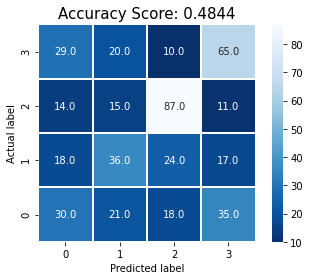

In [85]:
plt.figure()
ax = sns.heatmap(cm, annot=True, fmt=".1f", linewidths=1, square = True, cmap = 'Blues_r');
ax.set_ylim(0 ,4)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.4f}'.format(dev_acc)
plt.title(all_sample_title, size = 15);
plt.show();

**Reflect**: What do you observe on the above confusion matrix? If you are the leading manager for this team project, which portion of the data would you ask your team to focus on? 

**Your Answer Here**: 

## Precision, Recall, and F1

Write a function below that takes in a predicted labels 'Y_hat' and gold labels 'Y', and returns the precision, recall, and F1 for each label.

F1 is the harmonic mean of precision and recall. F1 = 2 * (precision * recall) / (precision + recall)

(10 points)

In [86]:
print(lab2.get_PRF(predictions, Y_dv, label_set, 'pre-1980'))
print(lab2.get_PRF(predictions, Y_dv, label_set, '1980s'))
print(lab2.get_PRF(predictions, Y_dv, label_set, '1990s'))
print(lab2.get_PRF(predictions, Y_dv, label_set, '2000s'))

(0.5078125, 0.19817073170731708, 0.28508771929824556)
(0.32967032967032966, 0.09523809523809523, 0.14778325123152708)
(0.391304347826087, 0.10746268656716418, 0.1686182669789227)
(0.6258992805755396, 0.2430167597765363, 0.3501006036217304)


In [87]:
label_set

['1980s', '1990s', '2000s', 'pre-1980']

In [88]:
def get_PRF(Y_hat_dv, Y_dv, label_set, label):

    ### BEGIN SOLUTION
    precision = 0.0
    recall = 0.0
    f1 = 0.0
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    lls={}
    for i,x in enumerate(label_set):
        lls[x]=i
    cor=lls[label]
    for i in range(len(Y_hat_dv)): 
        if Y_dv[i]==Y_hat_dv[i]==cor:
               TP+= 1
        if Y_hat_dv[i]==cor and Y_dv[i]!= cor:
               FP += 1
        if Y_dv[i]==Y_hat_dv[i]!= cor:
               TN += 1
        if Y_hat_dv[i] !=  cor and Y_dv[i]!=cor:
               FN += 1
 
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    f1=(2*precision*recall)/(precision+recall)
    return precision, recall, f1

In [89]:
### BEGIN HIDDEN TESTS
scikit_log_reg = LogisticRegression()
logisticRegr=scikit_log_reg.fit(X_tr, Y_tr)
predictions = logisticRegr.predict(X_dv)
# a,b,c = lab2.get_PRF(predictions, Y_dv, label_set, 'pre-1980')
a,b,c = get_PRF(predictions, Y_dv, label_set, 'pre-1980')
assert abs(a-0.5078125) < 0.01
assert abs(b-0.5241935483870968) < 0.01
assert abs(c-0.5158730158730158) < 0.01

a,b,c = lab2.get_PRF(predictions, Y_dv, label_set, '1980s')
assert abs(a-0.32967032967032966) < 0.01
assert abs(b-0.28846153846153844) < 0.01
assert abs(c-0.30769230769230765) < 0.01

a,b,c = lab2.get_PRF(predictions, Y_dv, label_set, '1990s')
assert abs(a-0.391304347826087) < 0.01
assert abs(b-0.37894736842105264) < 0.01
assert abs(c-0.3850267379679144) < 0.01

a,b,c = lab2.get_PRF(predictions, Y_dv, label_set, '2000s')
assert abs(a-0.6258992805755396) < 0.01
assert abs(b-0.6850393700787402) < 0.01
assert abs(c-0.6541353383458647) < 0.01
### END HIDDEN TESTS

C:\Users\Vijayendra Jagtap\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AssertionError: 